In [62]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))
import numpy as np
import tensorflow.keras as tfk
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve

# GPUs:  1
CPU times: total: 15.6 ms
Wall time: 50.9 ms


In [63]:
# fpr, tpr, thresholds = roc_curve()

In [64]:
df = pd.read_csv("data/customer_churn.csv")
df = df.drop('customerID',axis=1)

# <font color = 'lime'> EDA @ `df`</font>

In [65]:
error_count = 0
errors=[]
for x in df['TotalCharges']:
    try: 
        
        if isinstance(float(x),float):
            pass
    except:
        errors.append(x)
        error_count+=1

display(error_count)

display(errors)

11

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [66]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [67]:
impute_index = df[df['TotalCharges'].isna()].index
impute_index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [7]:
df.select_dtypes(['int64','float64'])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [8]:
df.tenure.nunique()

73

In [9]:
import scipy.stats as sp

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

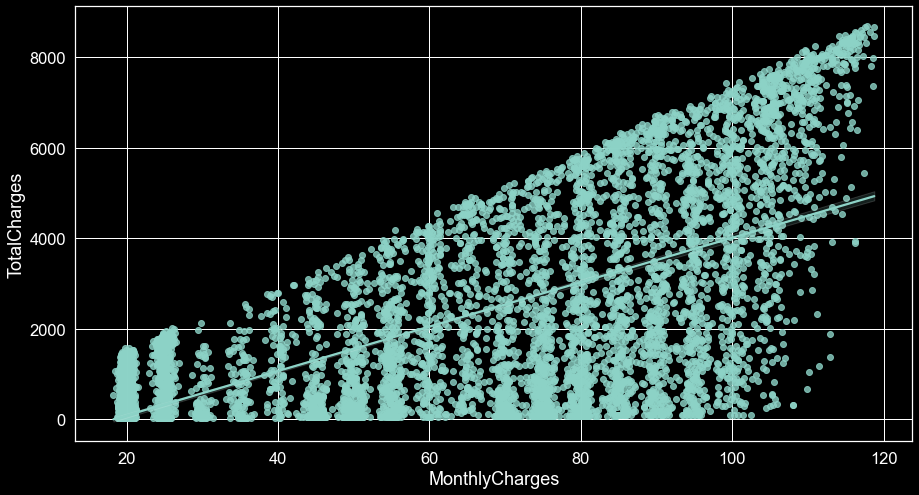

In [10]:
sns.regplot(data=df, x='MonthlyCharges',y='TotalCharges')

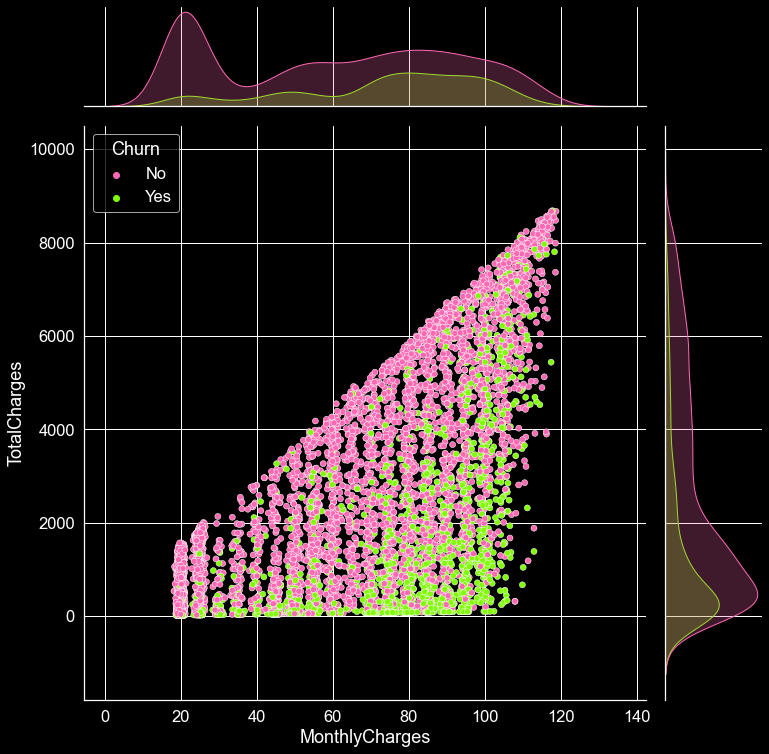

In [11]:
g=sns.jointplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Churn',palette=['hotpink','chartreuse'])
g.fig.set_size_inches(12,12)

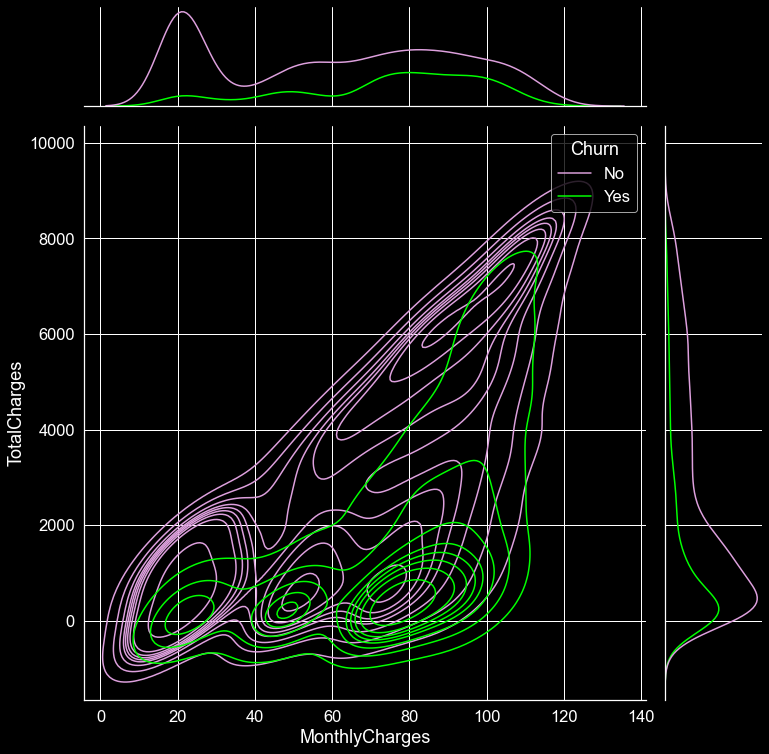

In [12]:
g=sns.jointplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Churn',kind='kde',palette=['plum','lime'])
g.fig.set_size_inches(12,12)

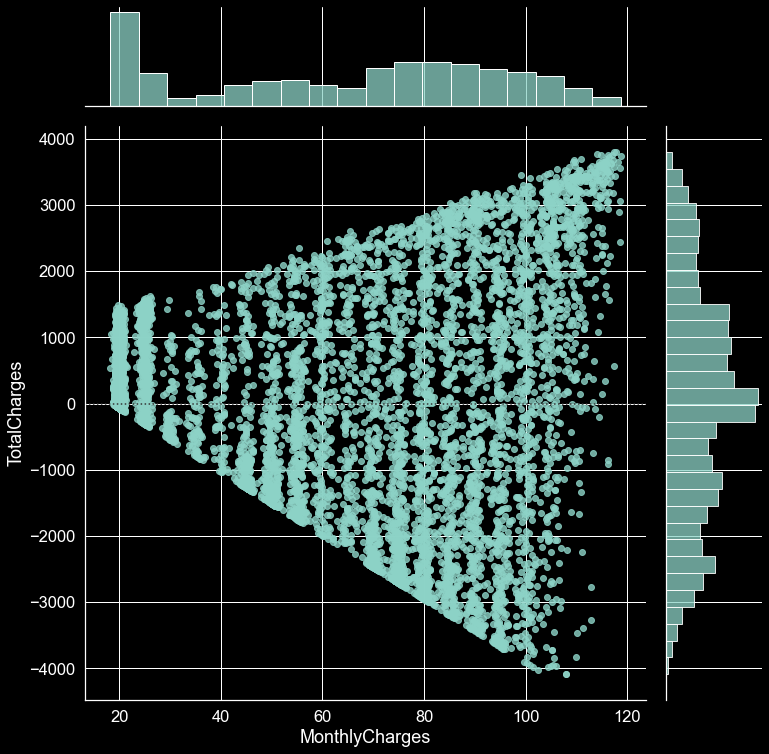

In [13]:
g=sns.jointplot(data=df, x='MonthlyCharges',y='TotalCharges',kind='resid')
g.fig.set_size_inches(12,12)

In [68]:
df_eda = df.dropna()

In [69]:
sp.pearsonr(x=df_eda['MonthlyCharges'], y=df_eda['TotalCharges'])

(0.6510648032262025, 0.0)

In [70]:
y = df.Churn.apply(lambda x : 1 if x == 'Yes' else 0)
# y=df[target]

target = 'Churn'
X = df.loc[:, df.columns != target]

In [71]:
X.dtypes.value_counts()

object     15
int64       2
float64     2
dtype: int64

# <font color = 'lime'> `make_column_transformer` : Data Preprocessing: Impute, OHE</font>

In [72]:
from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder

In [73]:
imputer = SimpleImputer()
ohe = OneHotEncoder()

In [74]:
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [75]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [76]:
list(X.select_dtypes("object").columns)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [77]:
impute_index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [78]:
from sklearn.compose import make_column_transformer

In [79]:
ct = make_column_transformer(
    (ohe, list(X.select_dtypes("object").columns) ), #objects
    (imputer, ['TotalCharges']),#impuite
    remainder='passthrough'
)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=415, test_size=0.33)

In [81]:
X_train_ct = pd.DataFrame(ct.fit_transform(X_train))
X_train_ct

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,5595.30,0.0,66.0,85.90
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,7133.45,0.0,62.0,115.05
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,608.80,0.0,7.0,89.75
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,439.20,0.0,19.0,24.10
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4874.70,1.0,55.0,85.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,6058.95,0.0,72.0,86.40
4714,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3092.65,0.0,54.0,55.00
4715,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1311.30,0.0,67.0,19.80
4716,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1374.90,0.0,16.0,90.70


In [82]:
X_test_ct = pd.DataFrame(ct.fit_transform(X_test))
X_test_ct

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,163.55,0.0,5.0,34.25
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1714.95,0.0,21.0,80.90
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,335.75,1.0,3.0,94.85
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,523.50,0.0,6.0,84.85
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,5025.80,0.0,52.0,94.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,700.45,0.0,35.0,20.75
2321,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1618.20,0.0,63.0,24.20
2322,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2265.25,0.0,29.0,80.15
2323,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,383.55,0.0,11.0,34.70


In [83]:
y_train.value_counts(),print('\n'),y_train.value_counts(normalize=True)

(0    3474
 1    1244
 Name: Churn, dtype: int64,
 None,
 0    0.736329
 1    0.263671
 Name: Churn, dtype: float64)

In [84]:
y_test.value_counts(),print('\n'),y_test.value_counts(normalize=True)

(0    1700
 1     625
 Name: Churn, dtype: int64,
 None,
 0    0.731183
 1    0.268817
 Name: Churn, dtype: float64)

In [52]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# <font color = 'lime'> VERIFY MODEL: IMPORT `.h5` </font>

In [56]:
from tensorflow.keras.models import load_model

load = load_model("models/Churn1.h5",custom_objects={"f1_m":f1_m,"recall_m":recall_m} )

load.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 45)                2070      
                                                                 
 dropout_20 (Dropout)        (None, 45)                0         
                                                                 
 dense_25 (Dense)            (None, 30)                1380      
                                                                 
 dropout_21 (Dropout)        (None, 30)                0         
                                                                 
 dense_26 (Dense)            (None, 15)                465       
                                                                 
 dropout_22 (Dropout)        (None, 15)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                

In [57]:
# Vgg16 = keras.models.load_model(model1 , custom_objects={"lr": lr_track })

In [86]:
%%time
load.fit(X_train_ct,y_train, validation_data = [X_test_ct, y_test],verbose=1, epochs=50,batch_size=2**3)

Epoch 1/50
590/590 [==============================] - 6s 6ms/step - loss: 0.4631 - acc: 0.7876 - f1_m: 0.3512 - recall_m: 0.3190 - val_loss: 0.4279 - val_acc: 0.7948 - val_f1_m: 0.3594 - val_recall_m: 0.3158
Epoch 2/50
590/590 [==============================] - 3s 5ms/step - loss: 0.4698 - acc: 0.7817 - f1_m: 0.3515 - recall_m: 0.3255 - val_loss: 0.4348 - val_acc: 0.7970 - val_f1_m: 0.3700 - val_recall_m: 0.3245
Epoch 3/50
590/590 [==============================] - 3s 6ms/step - loss: 0.4582 - acc: 0.7840 - f1_m: 0.3586 - recall_m: 0.3291 - val_loss: 0.4278 - val_acc: 0.8004 - val_f1_m: 0.3971 - val_recall_m: 0.3546
Epoch 4/50
590/590 [==============================] - 3s 5ms/step - loss: 0.4599 - acc: 0.7789 - f1_m: 0.3324 - recall_m: 0.3015 - val_loss: 0.4992 - val_acc: 0.7695 - val_f1_m: 0.1795 - val_recall_m: 0.1431
Epoch 5/50
590/590 [==============================] - 3s 6ms/step - loss: 0.4659 - acc: 0.7849 - f1_m: 0.3518 - recall_m: 0.3188 - val_loss: 0.4534 - val_acc: 0.7751 - 

In [87]:
load.evaluate(X_test_ct,y_test)

73/73 [==============================] - 0s 4ms/step - loss: 0.4401 - acc: 0.7815 - f1_m: 0.3529 - recall_m: 0.2454


[0.4401116967201233,
 0.7815054059028625,
 0.35287630558013916,
 0.24537768959999084]

# <font color = '#d92935'> Model ~ `TF: ANN` </font>

In [484]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [485]:
X_train_ct.shape[1]

45

In [486]:
%%time
model = Sequential()

model.add(Dense(45, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1, activation='sigmoid'))


CPU times: total: 15.6 ms
Wall time: 7.98 ms


In [492]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['acc',f1_m,recall_m])

In [513]:
history = model.fit(X_train_ct, y_train, validation_data=[X_test_ct, y_test],verbose=1,epochs=1000,batch_size=2**6)

Epoch 1/1000
74/74 [==============================] - 1s 7ms/step - loss: 0.4631 - acc: 0.7861 - f1_m: 0.4535 - recall_m: 0.3534 - val_loss: 0.4481 - val_acc: 0.7897 - val_f1_m: 0.4231 - val_recall_m: 0.2977
Epoch 2/1000
74/74 [==============================] - 0s 6ms/step - loss: 0.4646 - acc: 0.7819 - f1_m: 0.4509 - recall_m: 0.3606 - val_loss: 0.4431 - val_acc: 0.7815 - val_f1_m: 0.3672 - val_recall_m: 0.2447
Epoch 3/1000
74/74 [==============================] - 0s 6ms/step - loss: 0.4661 - acc: 0.7832 - f1_m: 0.4740 - recall_m: 0.3892 - val_loss: 0.4509 - val_acc: 0.7566 - val_f1_m: 0.1869 - val_recall_m: 0.1099
Epoch 4/1000
74/74 [==============================] - 0s 5ms/step - loss: 0.4615 - acc: 0.7853 - f1_m: 0.4485 - recall_m: 0.3457 - val_loss: 0.4510 - val_acc: 0.7768 - val_f1_m: 0.3292 - val_recall_m: 0.2137
Epoch 5/1000
74/74 [==============================] - 0s 5ms/step - loss: 0.4625 - acc: 0.7859 - f1_m: 0.4663 - recall_m: 0.3654 - val_loss: 0.4412 - val_acc: 0.7699 - 

<AxesSubplot:>

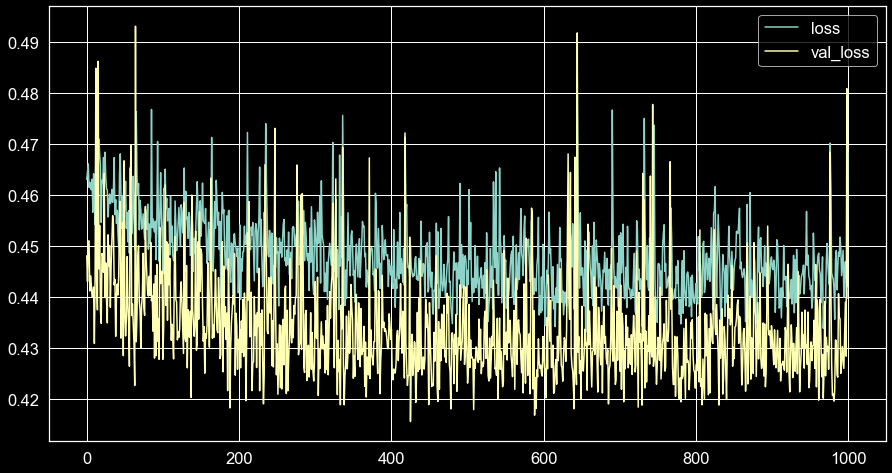

In [514]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

<AxesSubplot:>

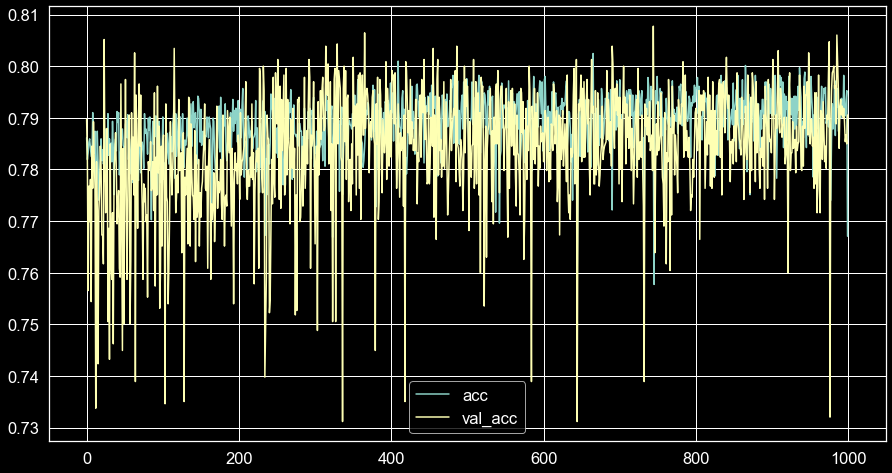

In [515]:
pd.DataFrame(history.history)[['acc','val_acc']].plot()

<AxesSubplot:>

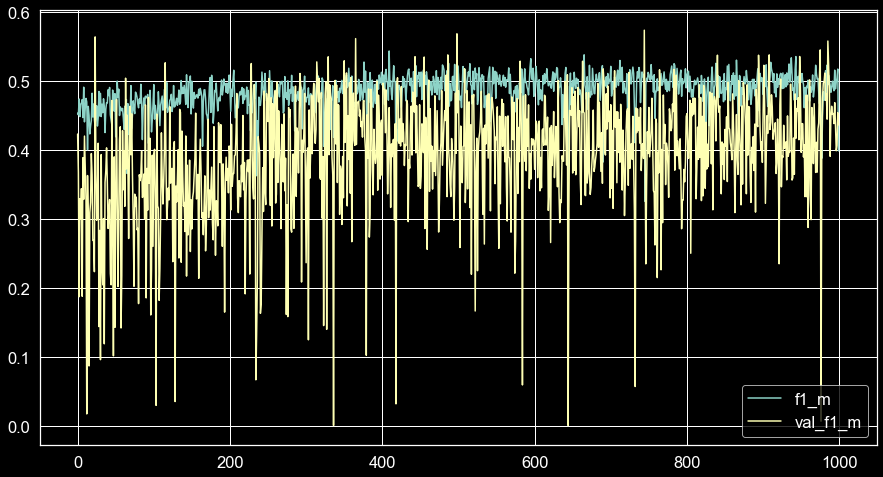

In [516]:
pd.DataFrame(history.history)[['f1_m','val_f1_m']].plot()

<AxesSubplot:>

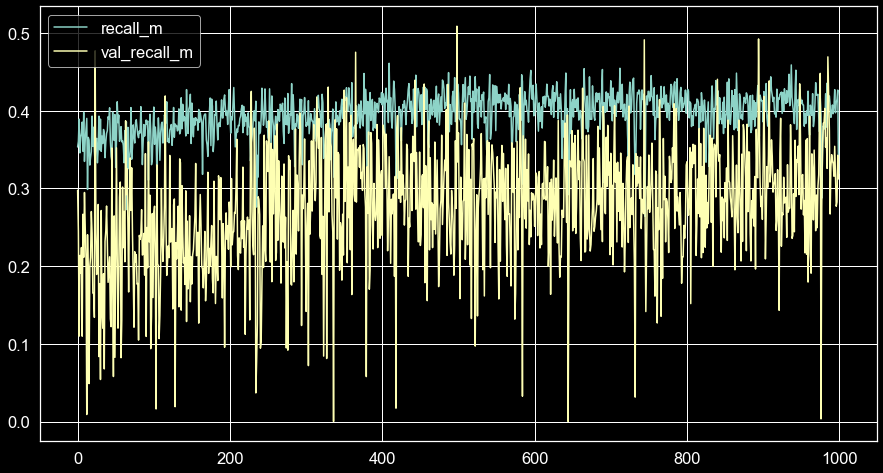

In [517]:
pd.DataFrame(history.history)[['recall_m','val_recall_m']].plot()

In [519]:
model.evaluate(X_test_ct,y_test)

73/73 [==============================] - 0s 4ms/step - loss: 0.4420 - acc: 0.7905 - f1_m: 0.4161 - recall_m: 0.3066


[0.4420275092124939,
 0.7905376553535461,
 0.41611069440841675,
 0.3066149950027466]

In [524]:
%%time
model.save("Churn1.h5")

CPU times: total: 0 ns
Wall time: 50.9 ms


In [520]:
import tensorflow as tf
from tensorflow import keras

In [521]:
# checkpoint